Question 1 - Extracting Tesla Stock Data Using yfinance

In [7]:
!pip install yfinance
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 kB 12.6 MB/s eta 0:00:00


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "html.parser")
table = soup.find('table',{'class':'historical_data_table table'})
headers = []
rows = []
for th in table.find_all('th'):
    headers.append(th.text.strip())
for tr in table.find_all('tr')[1:]:
    row = []
    for td in tr.find_all('td'):
        rows.append(td.text.strip())
    rows.append(row)
tesla_revenue = pd.DataFrame(data=rows, columns=headers)
print(tesla_revenue.tail())

   Tesla Annual Revenue(Millions of US $)
37                                   $117
38                                     []
39                                   2009
40                                   $112
41                                     []


Question 3: Use yfinance to Extract Stock Data

In [13]:
import yfinance as yf
import pandas as pd

tickerSymbol = 'GME'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2023-01-01', end='2023-03-05')
gme_data = tickerDf.reset_index()
gme_data.to_csv('gme_data.csv', index=False)
print(gme_data.head())

                       Date       Open       High        Low      Close  \
0 2023-01-03 00:00:00-05:00  18.639999  19.260000  17.090000  17.200001   
1 2023-01-04 00:00:00-05:00  17.250000  17.930000  16.900000  17.320000   
2 2023-01-05 00:00:00-05:00  17.059999  17.260000  15.890000  16.219999   
3 2023-01-06 00:00:00-05:00  16.000000  16.570000  15.410000  16.459999   
4 2023-01-09 00:00:00-05:00  16.650000  17.129999  16.360001  16.379999   

    Volume  Dividends  Stock Splits  
0  5135200        0.0           0.0  
1  3939300        0.0           0.0  
2  6066200        0.0           0.0  
3  4823400        0.0           0.0  
4  3522600        0.0           0.0  


Question 4: Use Webscraping to Extract GME Revenue Data

In [14]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url='https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "html.parser")
table = soup.find('table',{'class':'historical_data_table table'})
headers = []
rows = []
for th in table.find_all('th'):
    headers.append(th.text.strip())
for tr in table.find_all('tr')[1:]:
    row = []
    for td in tr.find_all('td'):
        rows.append(td.text.strip())
    rows.append(row)
gme_revenue = pd.DataFrame(data=rows, columns=headers)
print(gme_revenue.tail())

   GameStop Annual Revenue(Millions of US $)
37                                    $9,078
38                                        []
39                                      2009
40                                    $8,806
41                                        []


Question 5: Plot Tesla Stock Graph

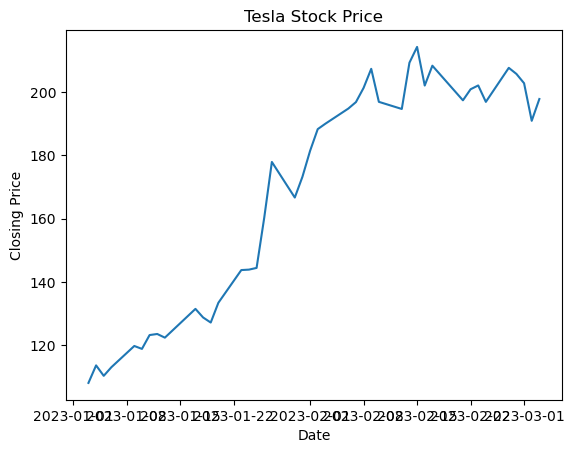

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickerSymbol = 'TSLA'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2023-01-01', end='2023-03-05')
def make_graph():
    plt.plot(tickerDf['Close'])
    plt.title('Tesla Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()
make_graph()

Question 6: Plot GameStop Stock Graph

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickerSymbol = 'TSLA'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2023-01-01', end='2023-03-05')
def make_graph():
    plt.plot(tickerDf['Close'])
    plt.title('Tesla Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()
make_graph()